# Interpretable K-Means: Cluster Feature Importance

# Introduction

One of the irritating problems when using unsupervised clustering methods is the unintuitive evaluation metrics and mapping that to your dataset. To elaborate by contradiction through supervised classification evaluation metrics: Accuracy, Precision, Recall, ...etc. can easily have an intuitive mapping to your dataset by saying: We have correctly classified X% samples out of all samples we have (Accuracy), we have correctly classified X% Positives out of all predicted positives (Precision), or we have correctly classified X% Positives out of all actual positives. 

Going back to evaluating unsupervised clustering algorithms, internal evaluation metrics (Where external information such as true labels are not used in the evaluation stage) are mostly used for comparison rather then an inherent and intuitive explanation of the clustering performance on the dataset at hand. Having an easy explanation of the model's performance is very crucial when communicating with stakeholders where most internal evaluation measure would not pass the ELI5 Test (Explain it Like I'm 5). Hence, interpreting why K-Mean has decided to cluster a certain group as such can be a great addition to your evaluation report 

# K-Means Value
Say that you are running a business which has thousands of customers, you would really want to know more about your customers albeit how many you have. You would never be able to study each customer and say cater a marketing campaign specifically for him/her. Each customer you have has different demographic (e.g. Age), Geographic (e.g. Region), Psychographic (e.g. Spending Habits)...etc. properties and you want to segment them into multiple similar groups in order to simplify the process of understanding who they are from the most prevalent properties of each group. The most popular algorithm to solve this problem, I am sure you guessed it! is K-Means; "K" will refer to the number of possible customer segments/groups/clusters and "Means" can be thought of as the center/Mean/centroid of each group in the K groups.

# How K-Means Works - Short

K-Means is an unsupervised clustering algorithm that groups similar data samples together in one group away from dissimilar data samples. Strictly speaking, K-Means aims to minimize the Within Cluster Sum of Squares (WCSS) and consequently maximizing the Between Cluster Sum of Squares (BCSS). K-Means algorithm has different implementation and conceptual variation but for the sake of this article, let's focus on the most common method namely Lloyd's algorithm (Naive K-Means) which follows an iterative approach in order to find the sub-optimal solution.

Let's prepare a simple dataset for explanation (If you already know how K-Means work, jump to the Interpretation section)

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_theme(style="whitegrid")

In [3]:
df = pd.DataFrame({
    "Sample Name": ["Sample "+str(i) for i in range(6)],
    "Feature1": [6, 5, 1, 2, 3, 4],
    "Feature2": [5, 6, 2, 1, 4, 3],
})
df

,Sample Name,Feature1,Feature2
0,Sample 0,6,5
1,Sample 1,5,6
2,Sample 2,1,2
3,Sample 3,2,1
4,Sample 4,3,4
5,Sample 5,4,3


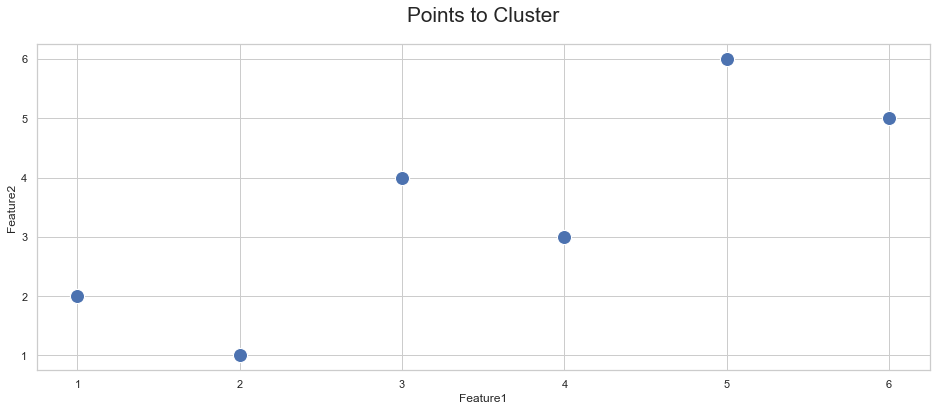

In [4]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(data=df, x="Feature1", y="Feature2", s=200)
ax.set_title("Points to Cluster", fontsize='xx-large', y=1.05);



#### Step 1 - Choose Initial Number of Groups/Clusters (K)
Each group is represented by a centroid; The mean of all data points assigned to a certain cluster centroid. Choosing an initial number of groups is synonymous to choosing an initial number of centroids K. We can decide on $K = 3$ and simply choose 3 distinct data points randomly from the dataset as our initial centroids (There are better methods to choose the initial coordinates of each centroid). 

![Figure 2](./images/fig_2.png)

#### Step 2 - Data points assignments to clusters (Centroids)
We have to assign each data point in our dataset to the closest centroid using the most commonly used distance metric through the following steps

1. Calculate the Euclidean distance between each centroid and all data points using the equation below for each $j$-th cluster centroid $C_{j}$ and one point $p$ for a dataset that has $d$-Dimensions. (Note: Do not confuse my usage of $C_j$ = $\mu_{C_j}$, as I'm only simplifying the equations since all equations are in a single cluster level)

<center>
    <font size="5">
$distance\left( C_j,p\right)   = \sqrt {\sum _{i=1}^{d}  \left( C_{ji}-p_{i}\right)^2 }$
    </font>
</center>

2. In order to minimize the WCSS, we assign each data point to its closest centroid (Most similar / Least Distant). 

    The reason why this will be a WCSS minimization step is from the equation for one cluster's $WCSS$ with $p_m$ number of points assigned to cluster $C_j$ where the shorter the distance for the points assigned to the cluster, the smaller its WCSS. 

<center>
    <font size="5">
$WCSS( C_j) = \sum\limits_{p_i=1 \; \in \; C_j}^{p_m}distance  ( C_{j} , p_{i})^2 $
    </font>
</center>

![Figure 3](./images/fig_3.png)

#### Step 3 - Update cluster centroid coordinates
Simply calculate the mean of each data point that belongs to a cluster and set the new cluster centroid to that new mean and repeat step 2 and 3 until the mean (Centroid) stops changing 

1. Calculate the mean of cluster data points
2. Set the new cluster centroid for the new mean
3. Repeat step 2 and 3 until the centroid does not change

We will end up with the following where you can by yourself take for example, `Sample 0` and `Sample 1` features, calculate their mean and then check if it equals to `Cluster Centroid D1` and `Cluster Centroid D2`

In [5]:
kms = KMeans(n_clusters=3, random_state=1).fit(df[['Feature1', 'Feature2']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df

,Sample Name,Feature1,Feature2,Cluster,Cluster Centroid D1,Cluster Centroid D2
0,Sample 0,6,5,2,5.5,5.5
1,Sample 1,5,6,2,5.5,5.5
2,Sample 2,1,2,1,1.5,1.5
3,Sample 3,2,1,1,1.5,1.5
4,Sample 4,3,4,0,3.5,3.5
5,Sample 5,4,3,0,3.5,3.5


This is how the data looks like after K-Means clustering

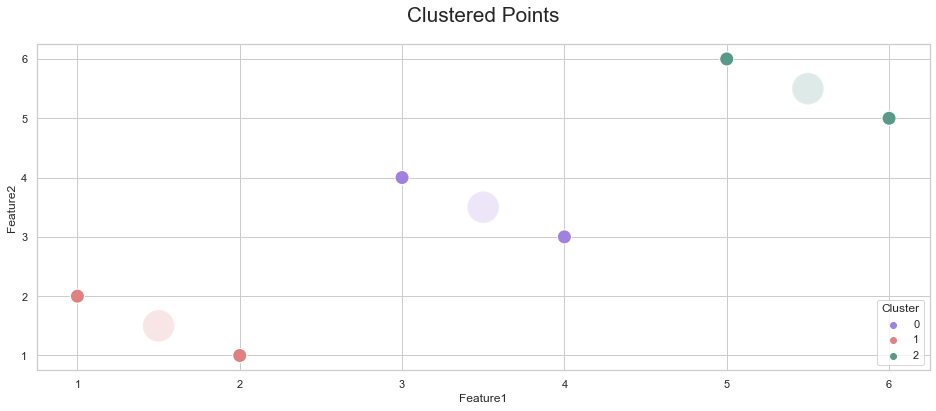

In [6]:
plt.figure(figsize=(16, 6))
colors = ["#A181E0", "#E08181", "#599988"]
ax = sns.scatterplot(data=df, x="Feature1", y="Feature2", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

# Interpretation  

## WCSS Minimizer `1st`
_Disclaimer: The author has developed this method. Please do not hesitate to cite any references if found or criticize the methodology_

The method is a direct analysis of each centroid's sub-optimal position. Since K-Means aim is to minimize the Within-Cluster Sum of Squares and assuming that the distance metric used is euclidean: We try to find the feature that was responsible for the highest amount of WCSS (The sum of squares of each data point distance to its cluster centroid) minimization through finding the maximum absolute centroid dimensional movement. 
 

Let's take the same example we have used:

### Explanation

In [7]:
df = pd.DataFrame({
    "Sample Name": ["Sample "+str(i) for i in range(6)],
    "Feature1": [6, 5, 1, 2, 3, 4],
    "Feature2": [5, 6, 2, 1, 4, 3],
})
df

,Sample Name,Feature1,Feature2
0,Sample 0,6,5
1,Sample 1,5,6
2,Sample 2,1,2
3,Sample 3,2,1
4,Sample 4,3,4
5,Sample 5,4,3


These are the cluster centroids that has been chosen through K-Means algorithm application above

In [8]:
kms = KMeans(n_clusters=3, random_state=1).fit(df[['Feature1', 'Feature2']])
df['Cluster'] = kms.labels_

In [9]:
centroids = kms.cluster_centers_
print(f"{centroids}")

[[3.5 3.5]
 [1.5 1.5]
 [5.5 5.5]]


![Figure 5](./images/fig_5.png)

The features that were used will be

In [10]:
features = df.columns.tolist()[1:-1]
print(f"{features}")

['Feature1', 'Feature2']


Now let's take each centroid and sort its dimensions, you will need to take the absolute value of if you have negative features

In [11]:
sorted_centroid_features_idx = centroids.argsort(axis=1)[:,::-1]
print(f"Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: \n{sorted_centroid_features_idx}")

print()

sorted_centroid_features = np.take_along_axis(centroids, sorted_centroid_features_idx, axis=1)
print(f"Sorted Feature/Dimension Values for Each Centroid in Descending Order: \n{sorted_centroid_features}")

Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: 
[[1 0]
 [1 0]
 [1 0]]

Sorted Feature/Dimension Values for Each Centroid in Descending Order: 
[[3.5 3.5]
 [1.5 1.5]
 [5.5 5.5]]


Let's take the first feature/dimension with sorted weights (Centroid distance traveled on feature plane)

In [12]:
first_feat_in_centroid_1 = centroids[0][sorted_centroid_features_idx[0]]
print(f"{first_feat_in_centroid_1}")

[3.5 3.5]


Let's map that to feature names with their weights which will be our feature importances

In [13]:
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[0]], 
            first_feat_in_centroid_1
        )
    ))

[('Feature2', 3.5), ('Feature1', 3.5)]


Since the centroid have moved with equal distances through both dimensions, the features will be of equal importance. Let's give the last two samples (Belonging to cluster 0) a nudge on the first dimension and repeat the same process

In [14]:
df.loc[[4,5], ["Feature1"]] += df.loc[[4,5], ["Feature1"]] + 30

# ... Repeated code above ... #
kms = KMeans(n_clusters=3, random_state=1).fit(df[['Feature1', 'Feature2']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
features = df.columns.tolist()[1:-1]
centroids = kms.cluster_centers_
sorted_centroid_features_idx = centroids.argsort(axis=1)[:,::-1]
sorted_centroid_features = np.take_along_axis(centroids, sorted_centroid_features_idx, axis=1)
first_feat_in_centroid_1 = centroids[0][sorted_centroid_features_idx[0]]
# ... Repeated code above ... #

In [15]:
kms.cluster_centers_

array([[37. ,  3.5],
       [ 5.5,  5.5],
       [ 1.5,  1.5]])

In [16]:
# plt.figure(figsize=(16, 6))
# colors = ["#A181E0", "#599988", "#E08181"]
# ax = sns.scatterplot(data=df, x="Feature1", y="Feature2", hue='Cluster', 
#                      s=200, palette=colors, legend=False)
# ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
#                      s=1000, palette=colors, legend=False, alpha=0.1)

# ax.set(xlim=(0, 40), ylim=(0,10))

# ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

![Figure 5](./images/fig_6.png)

In [17]:
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[0]], 
            first_feat_in_centroid_1
        )
    ))

[('Feature1', 37.0), ('Feature2', 3.5)]


We can see that the first feature now has had a higher importance since the first cluster centroid has moved through its dimension more than the second feature; Thus, feature one has had a higher importance in minimizing the WCSS

### Real-Life Application
I have chosen to apply the interpretation technique on an NLP problem since we can easily relate to the feature importances (words) which could be considered as a corpus-based keyword extraction technique where our aim is to cluster similar documents together using K-Means, and then apply the method above. The dataset I have used can be found here [Kaggle BBC-News](https://www.kaggle.com/c/learn-ai-bbc/data?select=BBC+News+Train.csv). This dataset presents a classification problem but we will exclude the category column at first (Sport, Business, Politics, Entertainment, and Technology News articles) and use it later as a proof-of-concept.

As this article is not an NLP article, I won't be focusing on any NLP related tasks. Now, Let us see the distribution of classes in the dataset:

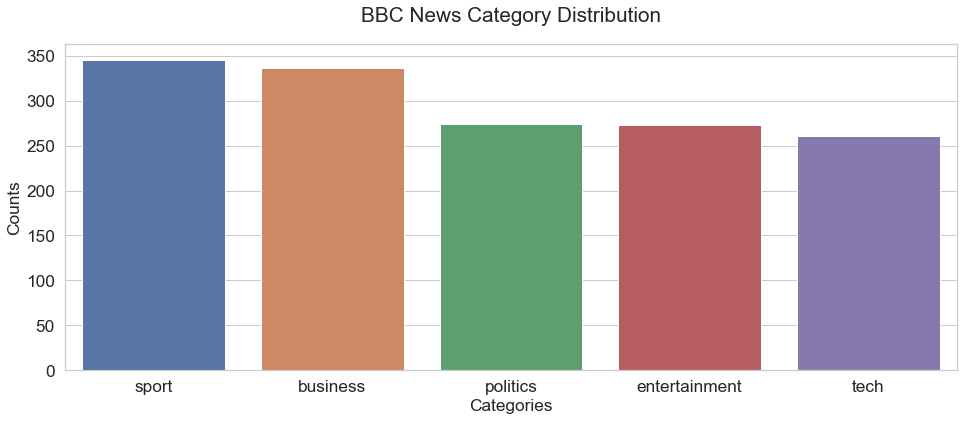

In [19]:
df = pd.read_csv("../BBC News Train.csv", encoding="utf-8")
categories = df['Category'].unique().tolist()

category_distrib = df['Category'].value_counts()

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=category_distrib.index, y=category_distrib.values)

plt.setp(ax.xaxis.get_label(), fontsize='x-large');
plt.setp(ax.yaxis.get_label(), fontsize='x-large');

ax.set_title("BBC News Category Distribution", fontsize="xx-large", y=1.05)
ax.set_xlabel("Categories", fontsize="x-large")
ax.set_ylabel("Counts", fontsize="x-large")

plt.setp(ax.get_xticklabels(), fontsize='x-large');
plt.setp(ax.get_yticklabels(), fontsize='x-large');

Quickly moving towards preprocessing the text to prepare the features. The code below is normalizing the words and filtering tokens (words or digits) that do not present a discriminatory power and thus redundant. 

In [20]:
import re
import pandas as pd
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

with open("../stopwords.txt", 'r') as f:
    stopwords_ = Counter(f.read().split("\n"))
    
def word_tokenize(text):
    tokenized_text = re.findall(r"[~\.,!?;’\":\'؟،؛»«…‘-“”]|[\w]+", text)
    tokenized_text_proc = [token.lower() for token in tokenized_text 
                           if  (not token.lower() in stopwords_) # Remove stopwords 
                           and (not len(token) <= 2)     # Remove short tokens
                           and (not re.match("\d+", token))]    # Remove Digits
    tokenized_text_proc = [lemmatizer.lemmatize(token) for token in tokenized_text_proc]
    return tokenized_text_proc

df['tokens'] = df['Text'].apply(word_tokenize)

These are the highest mentioned words in the whole news dataset

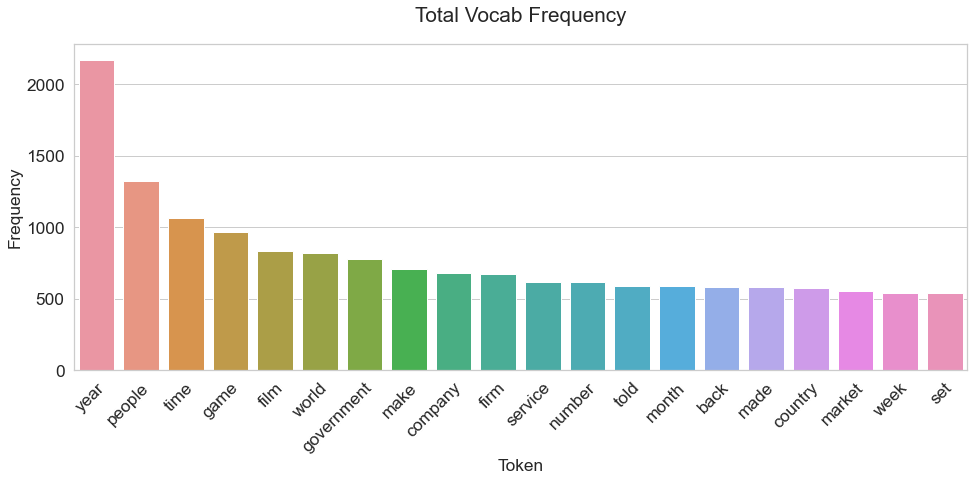

In [21]:
all_vocab = [token for sublist in df['tokens'].values for token in sublist]
all_vocab_freq = Counter(all_vocab)
all_vocab_freq_sorted = sorted(all_vocab_freq.items(), key=lambda x: x[1], reverse=True)
vocab_df = pd.DataFrame(all_vocab_freq_sorted, columns = ["Token", "Frequency"])

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=vocab_df.iloc[:20], 
                 x="Token", y="Frequency")
ax.set_title("Total Vocab Frequency", fontsize='xx-large', y=1.05)
plt.setp(ax.xaxis.get_label(), fontsize='x-large');
plt.setp(ax.yaxis.get_label(), fontsize='x-large');

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize='x-large');
plt.setp(ax.get_yticklabels(), fontsize='x-large');

Using TF-IDF (Text Representation Technique), we can convert the categorical variables (Words) we have into numerical representation. Remember to scale the features if you are applying K-Means on a data that has features of different units or ranges where this difference is not relevant to the problem. We do not need to scale the features here as TF-IDF normalizes features within its equation and its output should be used in its raw form

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(lowercase=False, tokenizer=lambda x:x, max_features=500)
cv_matrix = cv.fit_transform(df['tokens'])

Finally, now is the step we care about the most, I have wrapped up the method above in a class that inherits from sklearn.cluster.KMeans and can be used in the exact same way with the difference of having feature_importances_ property of which you will have to provide the features ordered in the same way as `X` parameter in the `fit` method to `ordered_feature_names` parameter when initializing the class. 

You can find the code here [kmeans-feature-importance](https://github.com/YousefGh/kmeans-feature-importance) and simply clone it like this in your favorite CLI


In [23]:
# ! git clone https://github.com/YousefGh/kmeans-feature-importance.git

Let's run K-Means algorithm

In [25]:
from kmeans_interp.kmeans_feature_imp import KMeansInterp

kms = KMeansInterp(n_clusters=len(categories), 
                   random_state=1, 
                   ordered_feature_names=cv.get_feature_names(), 
                   feature_importance_method='centroid_stretch',
                  ).fit(cv_matrix)
labels = kms.labels_
df['Cluster'] = labels

Let's check if K-Means has produced a cluster distribution similar to the category distribution in the news dataset

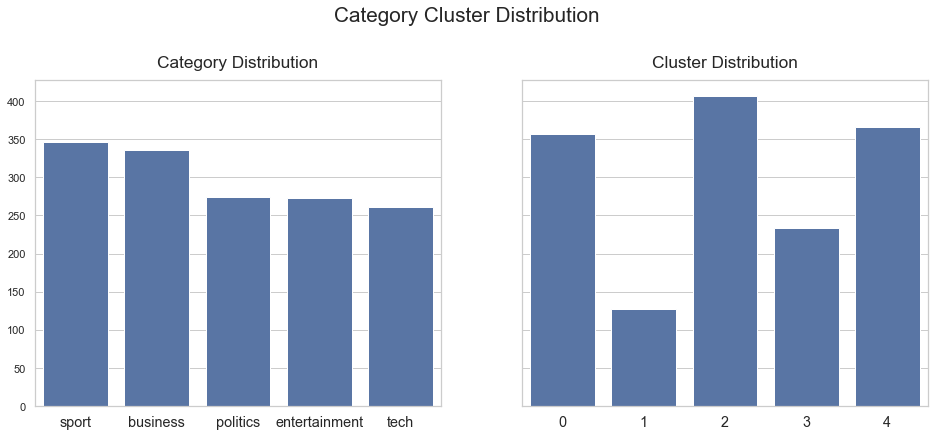

In [27]:
category_distrib = df['Category'].value_counts()
cluster_distrib = df['Cluster'].value_counts()

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,6))
fig.suptitle('Category Cluster Distribution', fontsize='xx-large', y=1.05)
axs[0].set_title("Category Distribution", fontsize='x-large', y=1.02)
axs[1].set_title("Cluster Distribution", fontsize='x-large', y=1.02)

plt.setp(axs[0].get_xticklabels(), fontsize='large');
plt.setp(axs[1].get_xticklabels(), fontsize='large');

sns.barplot(x=category_distrib.index, y=category_distrib.values, ax=axs[0], color='b')
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, ax=axs[1], color='b');
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize='large');

That's a close enough distribution similarity to get us going. Don't forget to ensure that K-Means has produced accurate results through the usage of different internal validation indexes (I won't be going through them as this will be out-of-scope) and you probably will not be having labels so you will also need to choose the best K in K-Means.

Onto the interpretation, we can access the feature_importances_ for the second cluster `cluster 1` as such:

In [28]:
kms.feature_importances_[1][:10]

[('film', 0.39589216529770005),
 ('award', 0.1605575985825074),
 ('actor', 0.12619074083837967),
 ('oscar', 0.1178746877093894),
 ('star', 0.1048044246433086),
 ('actress', 0.0805780582173732),
 ('movie', 0.07849181814402928),
 ('director', 0.07750076034520005),
 ('year', 0.05714139742209183),
 ('won', 0.05598607819724065)]

Let us take a look at all clusters and try to make sense out of it by mapping them to the actual labels (News categories)

In [32]:
for cluster_label, feature_weights in kms.feature_importances_.items():    
    df_feature_weight = pd.DataFrame(feature_weights[:15], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-45, ha="left");
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Highest Weight Features in Cluster {cluster_label}', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show();
    
    print('\n\n')

![Figure 5](./images/cat_distrib.png)

![Figure 5](./images/politics_tech_business_enter_cs.png)

![Figure 5](./images/sports_cs.png)

## Interpret `2nd` - Unsupervised 2 Supervised

Another interpretation approach is to convert the unsupervised classification problem into a supervised classification settings using an easily interpretable model such as tree-based models (We will be using a Random Forest Classifier). The steps to do this is as follows:

1. Change the cluster labels into  One-vs-All for each label
2. Train a classifier to discriminate between each cluster and all other clusters
3. Simply extract the feature importances from the model (We will be using `sklearn.ensemble.RandomForestClassifier`)

![Figure 5](./images/unsup2sup.png)

In [33]:
df['Cluster'] = labels
df['Cluster'].value_counts()

2    407
4    366
0    357
3    233
1    127
Name: Cluster, dtype: int64

Let's convert cluster 0 label as 1 and set all other cluster labels as 0's

In [34]:
print(df['Cluster'].value_counts())
df['Binary Cluster 0'] = df['Cluster'].map({0:1, 1:0, 2:0, 3:0, 4:0})
print()
print(df["Binary Cluster 0"].value_counts())

2    407
4    366
0    357
3    233
1    127
Name: Cluster, dtype: int64

0    1133
1     357
Name: Binary Cluster 0, dtype: int64


We can now train the classifier on the converted binary problem

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(cv_matrix, df["Binary Cluster 0"].values)

RandomForestClassifier(random_state=1)

Using `feature_importances_` method to get the features that has the most discriminatory power between all clusters and the targeted cluster. One important note is that this approach finds what discriminates between two clusters and not at all inherent to the targeted cluster

In [36]:
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1]

most_important_features = np.take_along_axis(np.array(cv.get_feature_names()), sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(np.array(clf.feature_importances_), sorted_feature_weight_idxes, axis=0)
list(zip(most_important_features, most_important_weights))[:10]

[('market', 0.04638902115153533),
 ('share', 0.039556547327112675),
 ('firm', 0.033580229689354354),
 ('company', 0.028662725820873522),
 ('economy', 0.028304835999080867),
 ('growth', 0.026744526394961658),
 ('analyst', 0.0261315936348229),
 ('oil', 0.02573301921190415),
 ('investment', 0.022058413010645962),
 ('price', 0.021292561468628516)]

### Real-Life Application

From the same cloned repository, you can instantiate the class `KMeansInterp` and set the `feature_importance_method` parameter as follows

In [38]:
from kmeans_interp.kmeans_feature_imp import KMeansInterp

kms = KMeansInterp(n_clusters=len(categories), 
                   random_state=1, 
                   ordered_feature_names=cv.get_feature_names(), 
                   feature_importance_method='unsup2sup',
                  ).fit(cv_matrix)
labels = kms.labels_
df['Cluster'] = labels

Let's do the same thing we did above and look at the most important features for each cluster

![Figure 5](./images/politics_tech_business_enter_unsup2sup.png)

![Figure 5](./images/sports_unsup2sup.png)

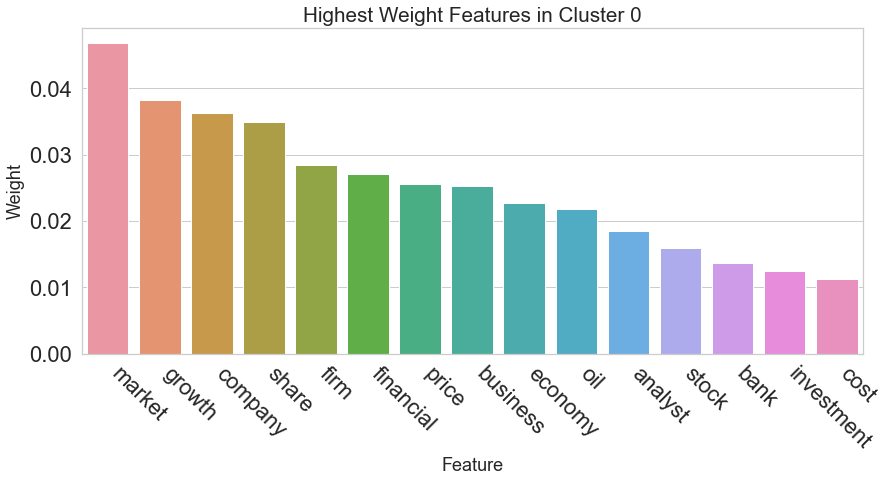

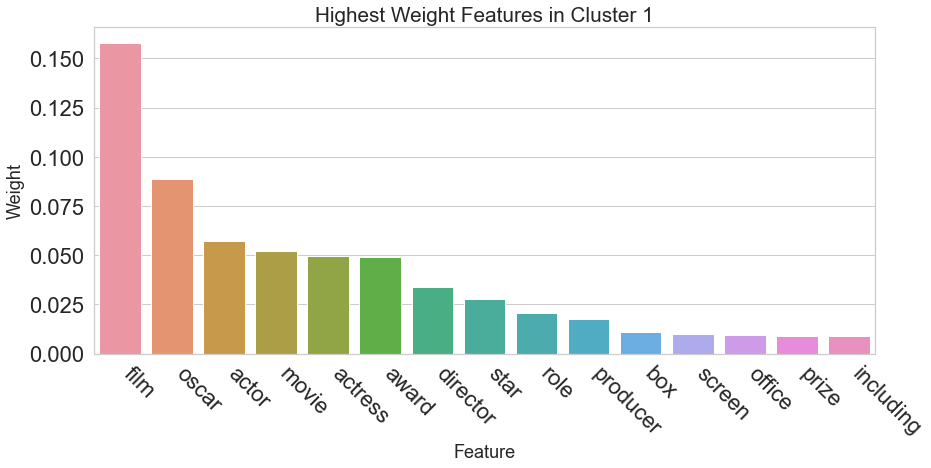

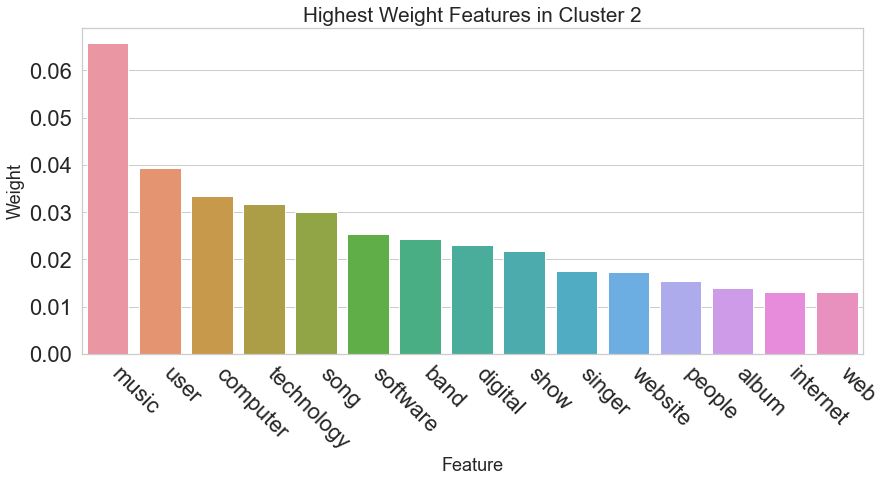

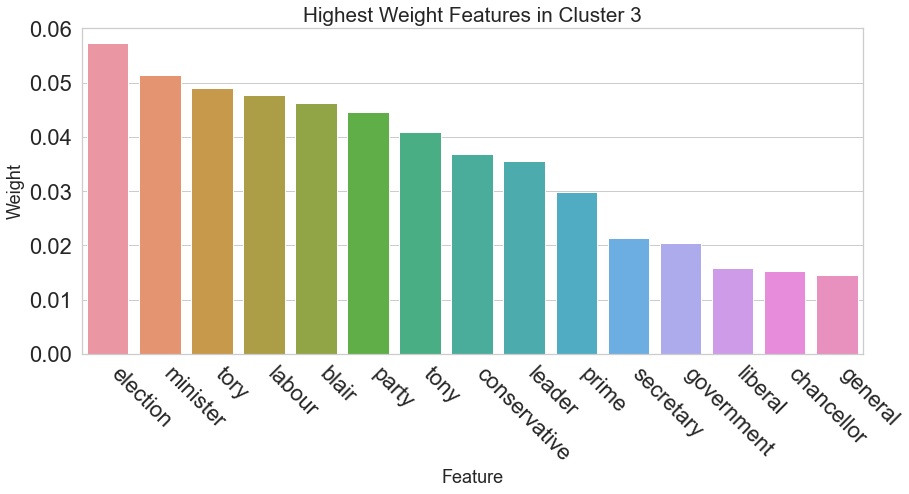

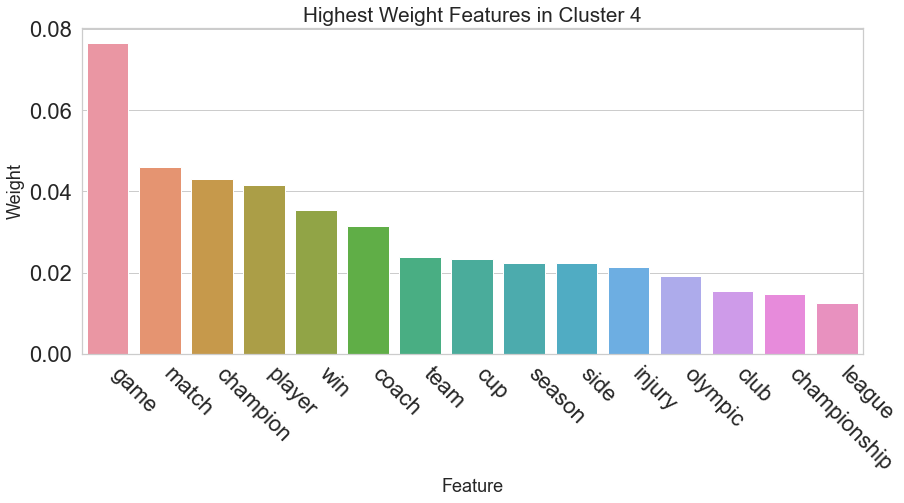

In [39]:
for cluster_label, feature_weights in kms.feature_importances_.items():    
    df_feature_weight = pd.DataFrame(feature_weights[:15], columns=["Feature", "Weight"])
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x="Feature", y="Weight", data=df_feature_weight)
    plt.xticks(rotation=-45, ha="left");
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'Highest Weight Features in Cluster {cluster_label}', fontsize='xx-large')
    plt.xlabel('Feature', fontsize=18)
    plt.ylabel('Weight', fontsize=18)

    plt.show();
    
    print('\n\n')

# Conclusion
Clustering Interpretability becomes crucial when truth labels are not available at development time. It not only prevents data scientist from a direct evaluation of clustering validity due to the nature of internal validation indexes, but also obstructs a simple and intuitive explanation of cluster performance to stakeholders. We have presented two possible approaches that aims to tackle this through through extracting a cluster-based feature importance which allows us to know why that cluster has been chosen by K-Means algorithm to be as such. The approach extends itself to stakeholder communication, simple and quick evaluation, cluster-based Keyword Extraction in NLP, as well as a general feature selection technique.

The notebook for this code and KMeansInterp class can be found in [this repository](https://github.com/YousefGh/kmeans-feature-importance)

#### References

1. Y. Liu, Z. Li, H. Xiong, X. Gao and J. Wu, "Understanding of Internal Clustering Validation Measures," 2010 IEEE International Conference on Data Mining, 2010, pp. 911-916, doi: 10.1109/ICDM.2010.35.

2. Kriegel, HP., Schubert, E. & Zimek, A. The (black) art of runtime evaluation: Are we comparing algorithms or implementations?. Knowl Inf Syst 52, 341–378 (2017). https://doi.org/10.1007/s10115-016-1004-2

3. Ng, A., & Piech, C. (2021). CS221. Retrieved 18 July 2021, from https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

4. Ismaili, Oumaima & Lemaire, Vincent & Cornuéjols, Antoine. (2014). A Supervised Methodology to Measure the Variables Contribution to a Clustering. 159-166. 10.1007/978-3-319-12637-1_20. 

In [ ]:
# colors = [
#     "#CC8963", # Business
#     "#B55D60", # Entertainment
#     "#857AAB", # Tech
#     "#5F9E6E", # Politics 
#     "#5975A4" # Sport
# ]